In [6]:
#LOADING THE ORIGINAL DATASET
import pandas as pd

# Load the data from the CSV file with the corrected file path
rideshare_data = pd.read_csv('/Users/nbale/Desktop/5260 Business Process Analytics/rideshare_kaggle.csv')

# Display the first few rows of the dataset
print(rideshare_data.head())

                                     id     timestamp  hour  day  month  \
0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1  4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2  981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3  c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4  e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   

              datetime          timezone            source    destination  \
0  2018-12-16 09:30:07  America/New_York  Haymarket Square  North Station   
1  2018-11-27 02:00:23  America/New_York  Haymarket Square  North Station   
2  2018-11-28 01:00:22  America/New_York  Haymarket Square  North Station   
3  2018-11-30 04:53:02  America/New_York  Haymarket Square  North Station   
4  2018-11-29 03:49:20  America/New_York  Haymarket Square  North Station   

  cab_type  ... precipIntensityMax uvIndexTime  temperatureMin  \
0     Lyft  ...     

In [3]:
#FINDING NULL VALUES

rideshare_data.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [5]:
missing_values = rideshare_data.isnull().sum()

# Columns with missing values
columns_with_missing_values = missing_values[missing_values > 0]

# Displaying columns with missing values and their counts
print(columns_with_missing_values)

price    55095
dtype: int64


In [6]:
#CHECKING THE DISTRIBUTION OF PRICE COLUMN

# From the above, we found that the price column has 55,095 missing values.
# To determine the best way to handle these missing values, we first analyzed the distribution of the price column. 
# This will help us decide whether to fill the missing values with the mean, median, or mode. If the column has 
# significant outliers, for instance, the median might be a more appropriate choice than the mean. 

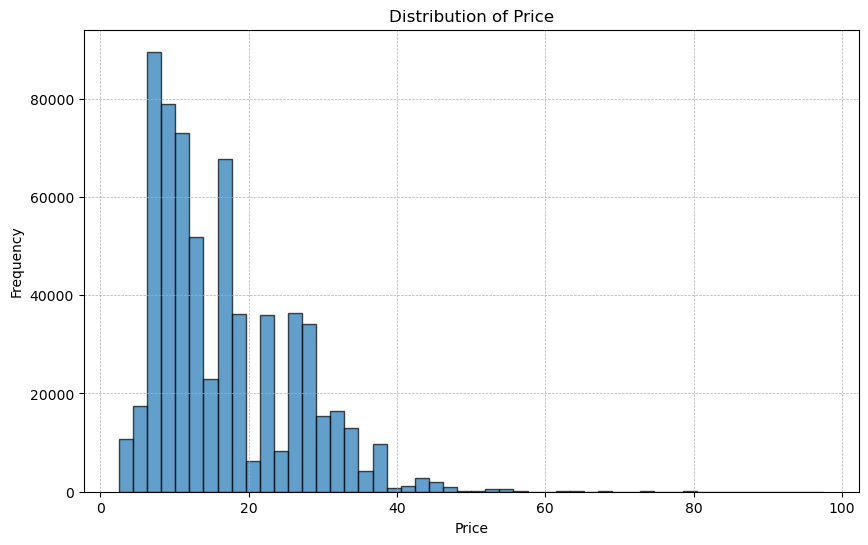

In [7]:
import matplotlib.pyplot as plt

# Plotting the distribution of the 'price' column
plt.figure(figsize=(10, 6))
plt.hist(rideshare_data['price'].dropna(), bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [8]:
# The distribution of the price column is somewhat right-skewed. Given this skewness, We felt that the median might be a more appropriate
# measure to fill in the missing values, as it is less affected by extreme values.
# Before we proceed with filling the missing values, we should also calculate the percentage of missing values in the 
# price column. If this percentage is high, we might consider other strategies, such as dropping the column. 
# calculated the percentage.

# A right-skewed distribution, also known as a positively skewed distribution, is a type of distribution in statistics where
# the tail on the right side (the upper tail) of the distribution is longer or fatter than the left tail. In other words, 
# the majority of the data points are concentrated on the left side of the distribution, and there are a few high-value
# outliers that extend the tail to the right.

# The mean (average) is typically greater than the median.The median is a better measure of central tendency than 
#the mean because it is less affected by the outliers in the right tail.

In [9]:
# Calculating the percentage of missing values in the 'price' column
missing_percentage = (columns_with_missing_values['price'] / len(rideshare_data)) * 100
missing_percentage

7.949402009317949

In [10]:
# The price column has approximately 7.95% missing values. Given that this percentage is not exceedingly high, 
# it's reasonable to impute the missing values rather than dropping the column.
# As discussed earlier, due to the right-skewed distribution of the price column, we use the median to fill in the 
# missing values. Let's proceed with this imputation.

In [11]:
#REPLACING NULL VALUES IN PRICE COLUMN WITH MEDIAN

# Filling the missing values in the 'price' column with its median
rideshare_data['price'].fillna(rideshare_data['price'].median(), inplace=True)

# Confirming that there are no more missing values
remaining_missing_values = rideshare_data.isnull().sum().sum()
remaining_missing_values

0

In [12]:
# All missing values have been successfully handled. The dataset now contains no missing values.

In [13]:
# Checking the data types of each column
data_types = rideshare_data.dtypes
data_types

id                              object
timestamp                      float64
hour                             int64
day                              int64
month                            int64
datetime                        object
timezone                        object
source                          object
destination                     object
cab_type                        object
product_id                      object
name                            object
price                          float64
distance                       float64
surge_multiplier               float64
latitude                       float64
longitude                      float64
temperature                    float64
apparentTemperature            float64
short_summary                   object
long_summary                    object
precipIntensity                float64
precipProbability              float64
humidity                       float64
windSpeed                      float64
windGust                 

In [14]:
#From the displayed data types, here are some observations and potential corrections:
#The timestamp column is of type float64. This should be converted to a datetime object.
#The datetime column is of type object (string). We convert this to a datetime object.
#Columns like windGustTime, temperatureHighTime, temperatureLowTime, apparentTemperatureHighTime, apparentTemperatureLowTime, sunriseTime, sunsetTime, 
#uvIndexTime, temperatureMinTime, temperatureMaxTime, apparentTemperatureMinTime, and apparentTemperatureMaxTime are of type int64 and seem to represent time. 
#These should be converted to datetime objects.
# Converting the timestamp and datetime columns to datetime objects and then proceed with the other columns.

# Convert 'timestamp' column to datetime
rideshare_data['timestamp'] = pd.to_datetime(rideshare_data['timestamp'], unit='s')

# Convert 'datetime' column to datetime
rideshare_data['datetime'] = pd.to_datetime(rideshare_data['datetime'])

# Columns that seem to represent time and should be converted to datetime
time_columns = ['windGustTime', 'temperatureHighTime', 'temperatureLowTime', 'apparentTemperatureHighTime',
                'apparentTemperatureLowTime', 'sunriseTime', 'sunsetTime', 'uvIndexTime', 'temperatureMinTime',
                'temperatureMaxTime', 'apparentTemperatureMinTime', 'apparentTemperatureMaxTime']

for col in time_columns:
    rideshare_data[col] = pd.to_datetime(rideshare_data[col], unit='s')
    
# Display the updated data types
updated_data_types = rideshare_data.dtypes
print(updated_data_types)

id                                     object
timestamp                      datetime64[ns]
hour                                    int64
day                                     int64
month                                   int64
datetime                       datetime64[ns]
timezone                               object
source                                 object
destination                            object
cab_type                               object
product_id                             object
name                                   object
price                                 float64
distance                              float64
surge_multiplier                      float64
latitude                              float64
longitude                             float64
temperature                           float64
apparentTemperature                   float64
short_summary                          object
long_summary                           object
precipIntensity                   

In [15]:
# The timestamp and datetime columns have been converted to datetime objects.
# Other columns that appeared to represent time have also been converted to datetime objects.

In [16]:
# Check for duplicate rows based on all columns
duplicate_rows = rideshare_data[rideshare_data.duplicated()]

# Removing duplicate rows
rideshare_data.drop_duplicates(inplace=True)

# Checking the number of duplicate rows that were removed
num_duplicates_removed = len(duplicate_rows)
print(num_duplicates_removed)

0


In [17]:
# There were no duplicate rows based on all columns in the dataset. Thus, no rows were removed. If you have any specific 
# columns in mind to check for duplicates, please let me know, and I'll proceed accordingly.

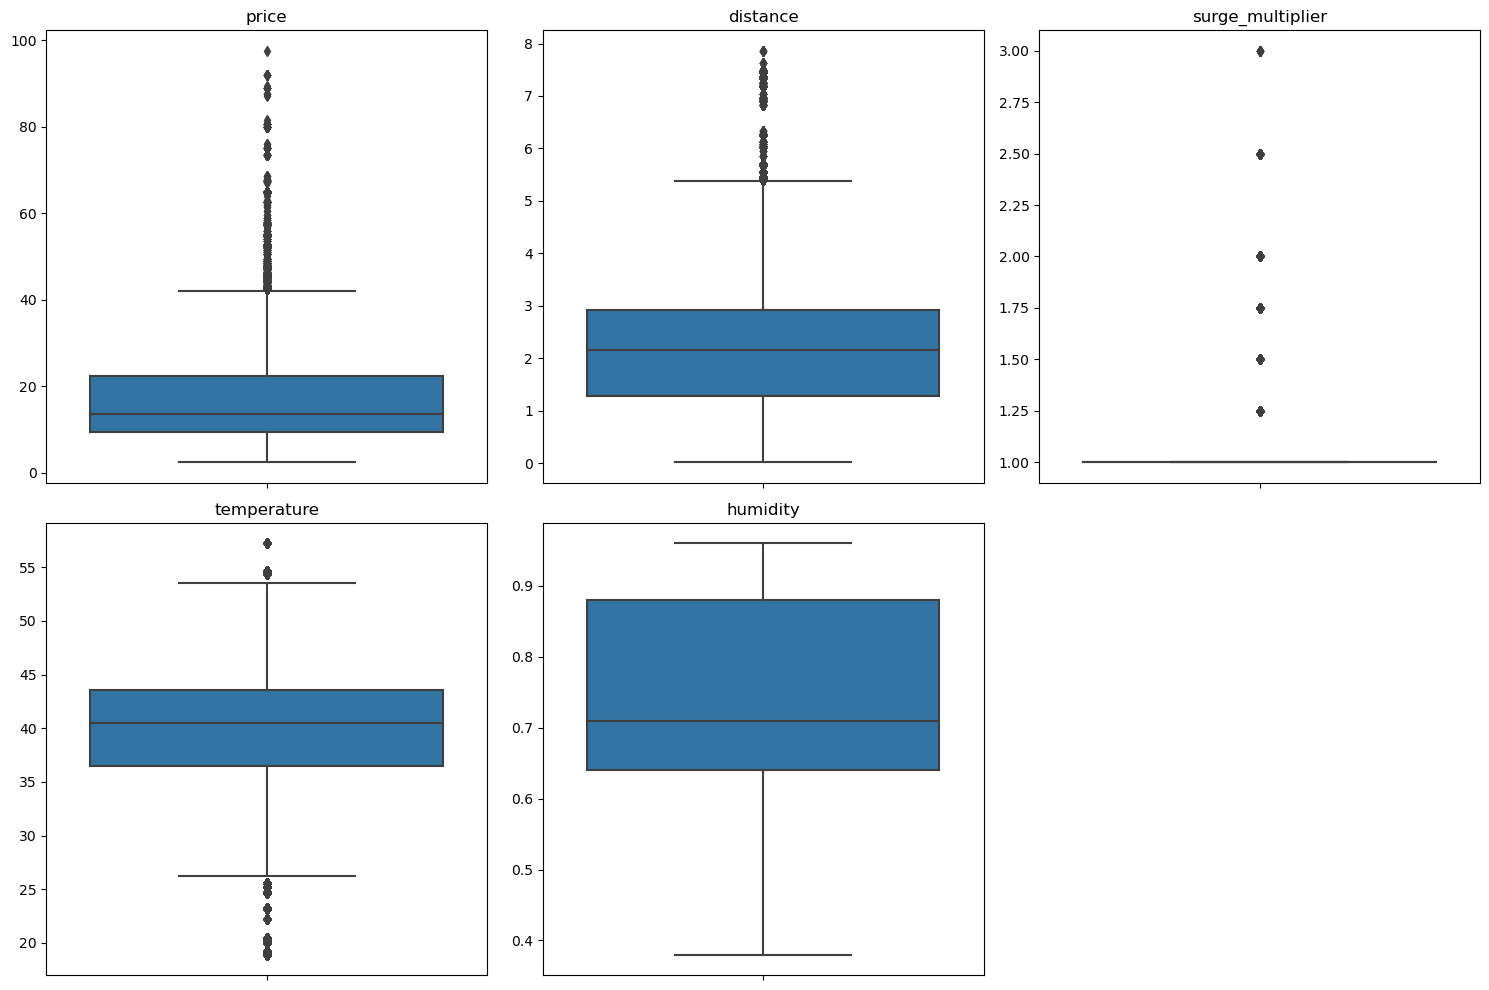

In [18]:
#Step 5: Outlier Detection and Removal

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Key columns to check for outliers
key_columns = ['price', 'distance', 'surge_multiplier', 'temperature', 'humidity']

# Plot boxplots to visualize outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(key_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=rideshare_data[col])
    plt.title(col)
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [19]:
#The boxplots provide insights into the distribution of the data and the presence of outliers:

#Price: There are several rides with prices that are considerably higher than the majority, indicating potential outliers.
#Distance: There are some rides with distances that are much longer than the typical ride.
#Surge Multiplier: Most rides have a surge multiplier of 1, but there are a few values above that which might be considered outliers.
#Temperature: The temperature distribution seems fairly consistent, with only a few potential outliers on the lower end.
#Humidity: The humidity distribution also looks fairly consistent with only minor potential outliers.

In [20]:
#Before deciding on a strategy, we decided to understand how many potential outliers exist for each column

# Calculated the number of outliers using IQR method for the key columns
outliers_count = {}

for col in key_columns:
    Q1 = rideshare_data[col].quantile(0.25)
    Q3 = rideshare_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = rideshare_data[(rideshare_data[col] < lower_bound) | (rideshare_data[col] > upper_bound)]
    outliers_count[col] = len(outliers)

outliers_count

{'price': 7982,
 'distance': 8662,
 'surge_multiplier': 20975,
 'temperature': 36659,
 'humidity': 0}

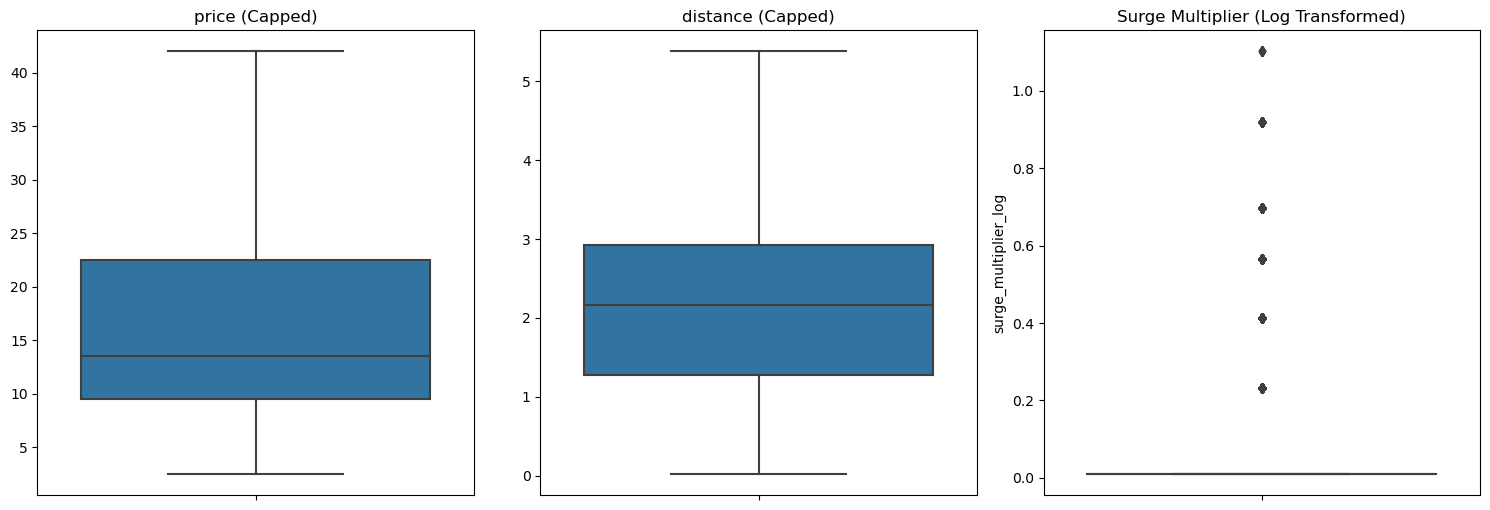

In [26]:
# Capping outliers for 'Distance' and 'Price'
for col in ['distance', 'price']:
    Q1 = rideshare_data[col].quantile(0.25)
    Q3 = rideshare_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    rideshare_data[col] = rideshare_data[col].clip(lower_bound, upper_bound)

# Apply logarithmic transformation to 'Surge Multiplier' (adding a small constant to avoid log(0))
rideshare_data['surge_multiplier_log'] = rideshare_data['surge_multiplier'].apply(lambda x: np.log(x + 0.01))

# Plot adjusted distributions
plt.figure(figsize=(15, 10))

# Plotting capped values for 'Price' and 'Distance'
for i, col in enumerate(['price', 'distance'], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=rideshare_data[col])
    plt.title(col + ' (Capped)')
    plt.ylabel('')

# Plotting transformed values for 'Surge Multiplier'
plt.subplot(2, 3, 3)
sns.boxplot(y=rideshare_data['surge_multiplier_log'])
plt.title('Surge Multiplier (Log Transformed)')

plt.tight_layout()
plt.show()


In [22]:
#The adjusted distributions are now displayed above:

#1)Price (Capped): The outliers have been capped, and the distribution now stays within the bounds.
#2)Distance (Capped): Similar to price, the distance outliers have been capped, and the distribution is now more constrained.
#3)Surge Multiplier (Log Transformed): After the logarithmic transformation, the distribution of the surge multiplier has been compressed,
#reducing the impact of extreme values.
#These adjustments helped us to make the data more robust against outliers.


#Since our research Questions are "Which factors impact ride prices and which factors influence customers choice of ride type?"
#We decided to leave the temperature outliers as they are because 

#1)Impact on Ride Prices: If extreme temperatures (very hot or cold days) lead to surges in ride prices due to increased demand or 
#decreased supply, then those outliers might be crucial to understanding the full picture. Capping or removing these values might
#distort the relationship between temperature and price.

#2)Influence on Ride Type Choice: Extreme temperatures might influence a customer's choice of ride type. 
#For instance, during very cold days, customers might prefer certain types of vehicles over others, or they might opt for premium services.
#Removing the outliers could potentially mask these patterns.

In [28]:
import re
from IPython.display import FileLink

# Assuming 'rideshare_data' is your DataFrame with HTML content

# Function to remove HTML tags from a string
def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', str(text))

# Apply the remove_html_tags function to all columns and cells in the DataFrame
cleaned_rideshare_data = rideshare_data.applymap(remove_html_tags)

# Save cleaned DataFrame to CSV file
cleaned_rideshare_data.to_csv('cleaned_rideshare_data.csv', index=False, encoding='utf-8')

# Provide a download link for the cleaned CSV file
FileLink('cleaned_rideshare_data.csv')

/Users/nbale/Downloads/cleaned_rideshare_data.csv